1. Remember that you need to use the magic functions (%sql or %%sql) when trying to run SQL commands; the former is used for single line commands whilst the latter is for multiple lines.

%lsmagic

!pip install ipython-sql

!pip install --upgrade pip --user

2. To add SQL extension :

%load_ext sql
--> The sql extension is already loaded. To reload it, use:
  %reload_ext sql
  
%reload_ext sql

3. Connect to database:

%sql sqlite:///northwind.db

To check:
%pwd

In this course, we will work with the well-known 'Northwind' database through SQLite. The norhwind database has 12 different tables we can query and is a good database for us to practice our SQL skills. The following diagram shows us how these tables are related to one another in our database.

#orders table --> order id is primary key
#order details table --> contain composite key (two primary key)
#in products table, supplier id is foreign key that refer back to primary key in suppliers table
#in order details table, product id is foreign key, that refer back to products table, we can also see that it is also composite key

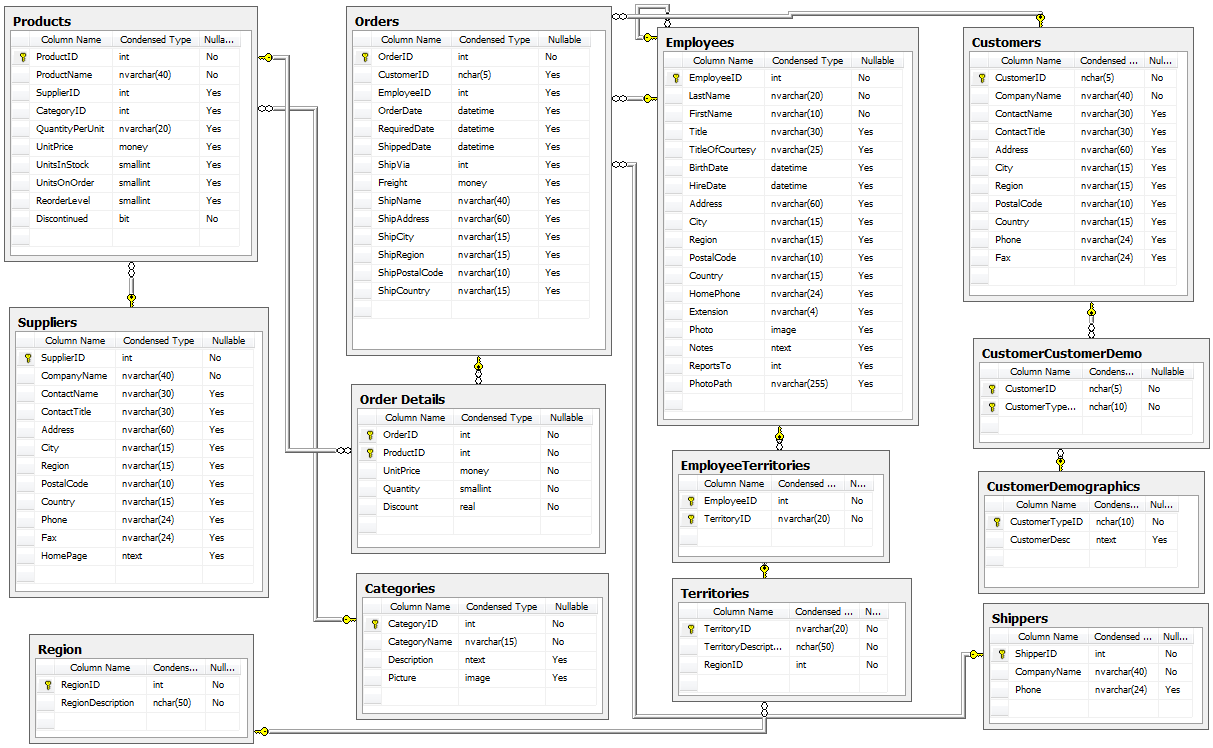

________________________________________________________

Data Manipulation Language (DML)
DML is the data manipulation commands in SQL and can be used to retrieve, store, modify, and delete data from database. Examples of DML are SELECT, INSERT, UPDATE, and DELETE.

Rujuk link ni: https://tdmdal.github.io/mma-sql/SQL_Intro_Sqlite.html

The SELECT statement is used to select data from a database.
The data returned is stored in a result table, called the result-set.

In [1]:
!pip install ipython-sql

To add SQL extension

In [1]:
%load_ext sql

In [2]:
#now connect to database
%sql sqlite:///northwind.sqlite3

In [3]:
%%sql
SELECT sqlite_version();

 * sqlite:///northwind.sqlite3
Done.


sqlite_version()
3.29.0


In [4]:
#using SELECT to take data from northwind
#using WHERE type="table" utk tunjuk setiap table and its rules
%sql SELECT name from sqlite_master WHERE type='table';

 * sqlite:///northwind.sqlite3
Done.


name
Suppliers
sqlite_sequence
Shippers
Employees
Customers
Orders
Categories
Products
OrderDetails


In [5]:
%sql SELECT name from sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

 * sqlite:///northwind.sqlite3
Done.


name
Suppliers
Shippers
Employees
Customers
Orders
Categories
Products
OrderDetails


In [6]:
%sql PRAGMA table_info([Categories]);

 * sqlite:///northwind.sqlite3
Done.


cid,name,type,notnull,dflt_value,pk
0,CategoryID,INTEGER,1,None,1
1,CategoryName,nvarchar(15),1,None,0
2,Description,ntext,0,None,0
3,Picture,image,0,None,0


In [7]:
%sql SELECT sql FROM sqlite_master WHERE type='table';

 * sqlite:///northwind.sqlite3
Done.


sql
"CREATE TABLE [Suppliers] ( [SupplierID] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [CompanyName] nvarchar(40) NOT NULL COLLATE NOCASE, [ContactName] nvarchar(30) NULL COLLATE NOCASE, [ContactTitle] nvarchar(30) NULL COLLATE NOCASE, [Address] nvarchar(60) NULL COLLATE NOCASE, [City] nvarchar(15) NULL COLLATE NOCASE, [Region] nvarchar(15) NULL COLLATE NOCASE, [PostalCode] nvarchar(10) NULL COLLATE NOCASE, [Country] nvarchar(15) NULL COLLATE NOCASE, [Phone] nvarchar(24) NULL COLLATE NOCASE, [Fax] nvarchar(24) NULL COLLATE NOCASE, [HomePage] ntext NULL)"
"CREATE TABLE sqlite_sequence(name,seq)"
"CREATE TABLE [Shippers] ( [ShipperID] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [CompanyName] nvarchar(40) NOT NULL COLLATE NOCASE, [Phone] nvarchar(24) NULL COLLATE NOCASE)"
"CREATE TABLE [Employees] ( [EmployeeID] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [LastName] nvarchar(20) NOT NULL COLLATE NOCASE, [FirstName] nvarchar(10) NOT NULL COLLATE NOCASE, [Title] nvarchar(30) NULL COLLATE NOCASE, [TitleOfCourtesy] nvarchar(25) NULL COLLATE NOCASE, [BirthDate] datetime NULL, [HireDate] datetime NULL, [Address] nvarchar(60) NULL COLLATE NOCASE, [City] nvarchar(15) NULL COLLATE NOCASE, [Region] nvarchar(15) NULL COLLATE NOCASE, [PostalCode] nvarchar(10) NULL COLLATE NOCASE, [Country] nvarchar(15) NULL COLLATE NOCASE, [HomePhone] nvarchar(24) NULL COLLATE NOCASE, [Extension] nvarchar(4) NULL COLLATE NOCASE, [Photo] image NULL, [Notes] ntext NULL, [ReportsTo] int NULL, [PhotoPath] nvarchar(255) NULL COLLATE NOCASE, CONSTRAINT [FK_Employees_Employees] FOREIGN KEY ([ReportsTo]) REFERENCES [Employees] ([EmployeeID]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
"CREATE TABLE [Customers] ( [CustomerID] nchar(5) NOT NULL, [CompanyName] nvarchar(40) NOT NULL COLLATE NOCASE, [ContactName] nvarchar(30) NULL COLLATE NOCASE, [ContactTitle] nvarchar(30) NULL COLLATE NOCASE, [Address] nvarchar(60) NULL COLLATE NOCASE, [City] nvarchar(15) NULL COLLATE NOCASE, [Region] nvarchar(15) NULL COLLATE NOCASE, [PostalCode] nvarchar(10) NULL COLLATE NOCASE, [Country] nvarchar(15) NULL COLLATE NOCASE, [Phone] nvarchar(24) NULL COLLATE NOCASE, [Fax] nvarchar(24) NULL COLLATE NOCASE, CONSTRAINT [PK_Customers] PRIMARY KEY ([CustomerID]))"
"CREATE TABLE [Orders] ( [OrderID] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [CustomerID] nchar(5) NOT NULL COLLATE NOCASE, [EmployeeID] int NULL, [OrderDate] datetime NULL, [RequiredDate] datetime NULL, [ShippedDate] datetime NULL, [ShipVia] int NULL, [Freight] money DEFAULT 0 NULL, [ShipName] nvarchar(40) NULL COLLATE NOCASE, [ShipAddress] nvarchar(60) NULL COLLATE NOCASE, [ShipCity] nvarchar(15) NULL COLLATE NOCASE, [ShipRegion] nvarchar(15) NULL COLLATE NOCASE, [ShipPostalCode] nvarchar(10) NULL COLLATE NOCASE, [ShipCountry] nvarchar(15) NULL COLLATE NOCASE, CONSTRAINT [FK_Orders_Customers] FOREIGN KEY ([CustomerID]) REFERENCES [Customers] ([CustomerID]) ON DELETE NO ACTION ON UPDATE NO ACTION, CONSTRAINT [FK_Orders_Employees] FOREIGN KEY ([EmployeeID]) REFERENCES [Employees] ([EmployeeID]) ON DELETE NO ACTION ON UPDATE NO ACTION, CONSTRAINT [FK_Orders_Shippers] FOREIGN KEY ([ShipVia]) REFERENCES [Shippers] ([ShipperID]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
"CREATE TABLE [Categories] ( [CategoryID] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [CategoryName] nvarchar(15) NOT NULL COLLATE NOCASE, [Description] ntext NULL, [Picture] image NULL)"
"CREATE TABLE [Products] ( [ProductID] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [ProductName] nvarchar(40) NOT NULL COLLATE NOCASE, [SupplierID] int NULL, [CategoryID] int NULL, [QuantityPerUnit] nvarchar(20) NULL COLLATE NOCASE, [UnitPrice] money DEFAULT 0 NULL, [UnitsInStock] smallint DEFAULT 0 NULL, [UnitsOnOrder] smallint DEFAULT 0 NULL, [ReorderLevel] smallint DEFAULT 0 NULL, [Discontinued] bit DEFAULT 0 NOT NULL, CONSTRAINT [FK_Products_Categories] FOREIGN KEY ([CategoryID]) REFERENCES [Categories] ([CategoryID]) ON DELETE NO ACTION ON UPDATE NO ACTION, CONSTRAINT [FK_Produc

Now, we will try to inspect table one by one

In [8]:
%%sql
SELECT *
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


Now, let's select certain column for table Customers

In [9]:
%%sql
SELECT ContactName as Customer, City as Live_At
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


Customer,Live_At
Maria Anders,Berlin
Ana Trujillo,México D.F.
Antonio Moreno,México D.F.
Thomas Hardy,London
Christina Berglund,Luleå
Hanna Moos,Mannheim
Frédérique Citeaux,Strasbourg
Martín Sommer,Madrid
Laurence Lebihan,Marseille
Elizabeth Lincoln,Tsawassen


In [10]:
%%sql
SELECT ContactName as Customer, City as Live_At
FROM Customers
LIMIT 10;

 * sqlite:///northwind.sqlite3
Done.


Customer,Live_At
Maria Anders,Berlin
Ana Trujillo,México D.F.
Antonio Moreno,México D.F.
Thomas Hardy,London
Christina Berglund,Luleå
Hanna Moos,Mannheim
Frédérique Citeaux,Strasbourg
Martín Sommer,Madrid
Laurence Lebihan,Marseille
Elizabeth Lincoln,Tsawassen


In [11]:
%%sql
SELECT COUNT(*)
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


COUNT(*)
91


In [12]:
%%sql
SELECT COUNT(City)
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


COUNT(City)
91


#SQL SELECT DISTINCT Statement#

The SELECT DISTINCT statement is used to return only distinct (different) values.
Inside a table, a column often contains many duplicate values; and sometimes you only want to list the different (distinct) values.
The SELECT DISTINCT statement is used to return only distinct (different) values.

In [13]:
%%sql
SELECT DISTINCT(City)
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


City
Aachen
Albuquerque
Anchorage
Barcelona
Barquisimeto
Bergamo
Berlin
Bern
Boise
Brandenburg


In [14]:
%%sql
SELECT COUNT(DISTINCT(City))
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


COUNT(DISTINCT(City))
69


In [15]:
%%sql
SELECT Country
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


Country
Germany
Mexico
Mexico
UK
Sweden
Germany
France
Spain
France
Canada


In [16]:
%%sql
SELECT DISTINCT (Country) AS Country
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


Country
Germany
Mexico
UK
Sweden
France
Spain
Canada
Argentina
Switzerland
Brazil


In [17]:
%%sql
SELECT COUNT(DISTINCT (Country)) AS Distinct_Count_Country
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


Distinct_Count_Country
21


#SQL Where Clause#

The WHERE clause is used to filter records. The WHERE clause is used to extract only those records that fulfill a specified condition.
The following SQL statement selects all the customer from the country "Mexico, in the "Customer" table:

In [18]:
%%sql
SELECT ContactName AS Customer_Mexico
FROM Customers
WHERE Country LIKE 'Mexico';

 * sqlite:///northwind.sqlite3
Done.


Customer_Mexico
Ana Trujillo
Antonio Moreno
Francisco Chang
Guillermo Fernández
Miguel Angel Paolino


Count how many customers are there from country Germany?

In [19]:
%%sql
SELECT COUNT(*) AS Total_Customers_Germany
FROM Customers
WHERE Country LIKE 'Germany';

 * sqlite:///northwind.sqlite3
Done.


Total_Customers_Germany
11


#Text Fields vs. Numeric Fields#

SQL requires single quotes around text values (most database systems will also allow double quotes). However, numeric fields should not be enclosed in quotes

In [20]:
%%sql
SELECT *
FROM Customers
LIMIT 5;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [21]:
%%sql
SELECT PostalCode
FROM Customers
WHERE PostalCode > 12209;

 * sqlite:///northwind.sqlite3
Done.


PostalCode
13008
14776
1675
1734
1756
21240
24100
28001
28023
28034


#Operators in the WHERE clause#

The following operators can be used in the WHERE clause:


|Operator | Description |
| :- | :-: | 
| =  | Equal|
| <> | Not equal |
| >  | Greater than|
| <  | Less than |
| >= | Greater than or Equal|
| <= |	Less than or Equal |
|BETWEEN |	Between an inclusive range|
|LIKE	| Search for a pattern|
| IN	| To specify multiple possible values for a column|

## SQL AND, OR and NOT Operators

### The WHERE clause can be combined with logical (AND, OR, and NOT) operators

|AND Operator |
|:-|
| A | B | A and B |
| False  | False | FALSE |
| False | True |FALSE|
| True  | False|FALSE|
| True  | True |TRUE|

|OR Operator |
|:-|
| A | B | A or B |
| False  | False | FALSE |
| False | True |TRUE|
| True  | False|TRUE|
| True  | True |TRUE|

#AND Example#

The following SQL statement selects all fields from "Customers" where country is "USA" AND Region is "WA":

In [22]:
%%sql
SELECT * 
FROM Customers
WHERE (country LIKE 'USA') &
      (region LIKE 'WA');

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
LAZYK,Lazy K Kountry Store,John Steel,Marketing Manager,12 Orchestra Terrace,Walla Walla,WA,99362,USA,(509) 555-7969,(509) 555-6221
TRAIH,Trail's Head Gourmet Provisioners,Helvetius Nagy,Sales Associate,722 DaVinci Blvd.,Kirkland,WA,98034,USA,(206) 555-8257,(206) 555-2174
WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,WA,98128,USA,(206) 555-4112,(206) 555-4115


In [23]:
%%sql
SELECT DISTINCT (Region) AS region
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


region
None
AK
BC
CA
Co. Cork
DF
ID
Isle of Wight
Lara
MT


#OR Example#

The following SQL statement selects all fields from "Customers" where country is "France" OR "Germany":

In [24]:
%%sql
SELECT *
FROM Customers
WHERE (country LIKE 'FRANCE') | (country LIKE 'Germany');

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
DRACD,Drachenblut Delikatessen,Sven Ottlieb,Order Administrator,Walserweg 21,Aachen,None,52066,Germany,0241-039123,0241-059428
DUMON,Du monde entier,Janine Labrune,Owner,"67, rue des Cinquante Otages",Nantes,None,44000,France,40.67.88.88,40.67.89.89
FOLIG,Folies gourmandes,Martine Rancé,Assistant Sales Agent,"184, chaussée de Tournai",Lille,None,59000,France,20.16.10.16,20.16.10.17
FRANK,Frankenversand,Peter Franken,Marketing Manager,Berliner Platz 43,München,None,80805,Germany,089-0877310,089-0877451
FRANR,France restauration,Carine Schmitt,Marketing Manager,"54, rue Royale",Nantes,None,44000,France,40.32.21.21,40.32.21.20
KOENE,Königlich Essen,Philip Cramer,Sales Associate,Maubelstr. 90,Brandenburg,None,14776,Germany,0555-09876,None


In [25]:
%%sql
SELECT COUNT(*) 
FROM Customers
WHERE (country LIKE 'France');

 * sqlite:///northwind.sqlite3
Done.


COUNT(*)
11


In [26]:
%%sql
SELECT COUNT(*) 
FROM Customers
WHERE (country LIKE 'Germany');

 * sqlite:///northwind.sqlite3
Done.


COUNT(*)
11


In [27]:
%%sql
SELECT *
FROM Customers
WHERE country IN ('France', 'Germany');

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
DRACD,Drachenblut Delikatessen,Sven Ottlieb,Order Administrator,Walserweg 21,Aachen,None,52066,Germany,0241-039123,0241-059428
DUMON,Du monde entier,Janine Labrune,Owner,"67, rue des Cinquante Otages",Nantes,None,44000,France,40.67.88.88,40.67.89.89
FOLIG,Folies gourmandes,Martine Rancé,Assistant Sales Agent,"184, chaussée de Tournai",Lille,None,59000,France,20.16.10.16,20.16.10.17
FRANK,Frankenversand,Peter Franken,Marketing Manager,Berliner Platz 43,München,None,80805,Germany,089-0877310,089-0877451
FRANR,France restauration,Carine Schmitt,Marketing Manager,"54, rue Royale",Nantes,None,44000,France,40.32.21.21,40.32.21.20
KOENE,Königlich Essen,Philip Cramer,Sales Associate,Maubelstr. 90,Brandenburg,None,14776,Germany,0555-09876,None


In [28]:
%%sql
SELECT COUNT(*)
FROM Customers
WHERE country IN ('France', 'Germany');

 * sqlite:///northwind.sqlite3
Done.


COUNT(*)
22


In [29]:

%%sql
/*count how many customers from country france or germany*/
SELECT COUNT(*)
FROM Customers
WHERE ((country LIKE 'France')|(country LIKE 'GERMANY'));

 * sqlite:///northwind.sqlite3
Done.


COUNT(*)
22


Notice that comment can only be added to line after the %%sqlor %sql magic function!

#NOT Example#

The following SQL statement selects all fields from "Customers"where country is NOT "USA":¶

In [30]:
%%sql
SELECT *
FROM Customers
WHERE country <> 'USA';

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


In [31]:

%%sql
/*counting customers from USA*/
SELECT COUNT(*)
FROM Customers
WHERE country LIKE 'USA';

 * sqlite:///northwind.sqlite3
Done.


COUNT(*)
13


##Combining AND, OR and NOT##

The following SQL statement selects all fields from "Customers" where country is "USA" AND city must be "Portland" OR "Seattle" (use parenthesis to form complex expressions):

In [32]:
%%sql
SELECT *
FROM Customers
WHERE (country LIKE 'USA') &
      ((city LIKE 'Portland') | (city LIKE 'Seattle'));

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
LONEP,Lonesome Pine Restaurant,Fran Wilson,Sales Manager,89 Chiaroscuro Rd.,Portland,OR,97219,USA,(503) 555-9573,(503) 555-9646
THEBI,The Big Cheese,Liz Nixon,Marketing Manager,89 Jefferson Way Suite 2,Portland,OR,97201,USA,(503) 555-3612,None
WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,WA,98128,USA,(206) 555-4112,(206) 555-4115


In [33]:
%%sql
SELECT *
FROM Customers
WHERE ((country LIKE 'USA') &
      (city IN ('Portland', 'Seattle')));

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
LONEP,Lonesome Pine Restaurant,Fran Wilson,Sales Manager,89 Chiaroscuro Rd.,Portland,OR,97219,USA,(503) 555-9573,(503) 555-9646
THEBI,The Big Cheese,Liz Nixon,Marketing Manager,89 Jefferson Way Suite 2,Portland,OR,97201,USA,(503) 555-3612,None
WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,WA,98128,USA,(206) 555-4112,(206) 555-4115


#Exercise 1:#

Write a SQL query that selects all fields from "Customers" where the country is NOT "Germany" and NOT "France":

In [34]:
%%sql
SELECT *
FROM Customers
WHERE ((country <> 'Germany') & (country <> 'France'));

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745
BSBEV,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None
CACTU,Cactus Comidas para llevar,Patricio Simpson,Sales Agent,Cerrito 333,Buenos Aires,None,1010,Argentina,(1) 135-5555,(1) 135-4892
CENTC,Centro comercial Moctezuma,Francisco Chang,Marketing Manager,Sierras de Granada 9993,México D.F.,None,05022,Mexico,(5) 555-3392,(5) 555-7293
CHOPS,Chop-suey Chinese,Yang Wang,Owner,Hauptstr. 29,Bern,None,3012,Switzerland,0452-076545,None


#ORDER BY#

The ORDER BY keyword is used to sort the result-set in ascending or descending order. The ORDER BY keyword sorts the records in ascending order by default. To sort the records in descending order, use the DESC keyword.

SELECT column1, column2, ...
FROM table_name
ORDER BY column1, column2, ... ASC|DESC;

The following SQL statement selects all customers from the "Customers" table, sorted by the "Country" column:

In [35]:
%%sql
/*order by default it arranges in ascending order*/
SELECT ContactName, Country
FROM Customers
ORDER BY Country;

 * sqlite:///northwind.sqlite3
Done.


ContactName,Country
Patricio Simpson,Argentina
Yvonne Moncada,Argentina
Sergio Gutiérrez,Argentina
Roland Mendel,Austria
Georg Pipps,Austria
Catherine Dewey,Belgium
Pascale Cartrain,Belgium
Pedro Afonso,Brazil
Aria Cruz,Brazil
André Fonseca,Brazil


#Exercise 2#

Write a SQL statement selects all customers from the "Customers" table, sorted DESCENDING by the "Country" column:

In [36]:
%%sql

SELECT ContactName, Country
FROM Customers
ORDER BY Country DESC;

 * sqlite:///northwind.sqlite3
Done.


ContactName,Country
Manuel Pereira,Venezuela
Carlos Hernández,Venezuela
Carlos González,Venezuela
Felipe Izquierdo,Venezuela
Howard Snyder,USA
Yoshi Latimer,USA
John Steel,USA
Jaime Yorres,USA
Fran Wilson,USA
Rene Phillips,USA


#ORDER BY Several Columns Example#

The following SQL statement selects all customers from the "Customers" table, sorted by the "Country" and the "CompanyName" column:

In [37]:
%%sql
SELECT ContactName
FROM Customers
ORDER BY Country, CompanyName;

 * sqlite:///northwind.sqlite3
Done.


ContactName
Patricio Simpson
Yvonne Moncada
Sergio Gutiérrez
Roland Mendel
Georg Pipps
Catherine Dewey
Pascale Cartrain
Pedro Afonso
Aria Cruz
André Fonseca


#Exercise 3#

Write a SQL statement to select all customers from the "Customers" table, sorted ascending by the "Country" and descending by the "CompanyName" column:

In [38]:
%%sql
SELECT ContactName
FROM Customers
ORDER BY Country ASC, CompanyName DESC;

 * sqlite:///northwind.sqlite3
Done.


ContactName
Sergio Gutiérrez
Yvonne Moncada
Patricio Simpson
Georg Pipps
Roland Mendel
Pascale Cartrain
Catherine Dewey
Paula Parente
Anabela Domingues
Janete Limeira


#INSERT INTO#

The INSERT INTO statement is used to insert new rows in a table.
There are two ways to insert records into a table, the first way is specifying the column names and the values to be inserted.
The second way is inserting all of the fields into a table without specifying the column names in the SQL query. However, make sure the order of the values is in the same order as the columns in the table.

INSERT INTO table_name (column1, column2, column3, ...)
VALUES (value1, value2, value3, ...);

OR

INSERT INTO table_name
VALUES (value1, value2, value3, ...);

In [39]:
%%sql
SELECT CustomerID
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


CustomerID
ALFKI
ANATR
ANTON
AROUT
BERGS
BLAUS
BLONP
BOLID
BONAP
BOTTM


In [40]:
%%sql
/*count the numbers of customerid*/
SELECT COUNT(CustomerID) AS Number_of_Customer
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


Number_of_Customer
91


In [41]:
%%sql
/*distinct customerid*/
SELECT DISTINCT(CustomerID) AS Unique_Customer
FROM Customers;

 * sqlite:///northwind.sqlite3
Done.


Unique_Customer
ALFKI
ANATR
ANTON
AROUT
BERGS
BLAUS
BLONP
BOLID
BONAP
BOTTM


The following SQL statement inserts a new record in the Customers table:

Eg:-

#inserting for CustomerId=Cart001#

%%sql

INSERT INTO Customers (CustomerID, CompanyName, ContactName, address, City, PostalCode, Country)

VALUES ('CARTO01','Cardinal', 'Tom B. Erichsen', 'Skagen 21','Stavanger', '4006', 'Norway');
___________________________________________________________________________________________________________________________
#inserting for CustomerId=Cart002#

%%sql

INSERT INTO Customers

VALUES ('CARTO02','Cardinal', 'Tom B. Erichsen', 'Skagen 21','Stavanger', '4006', 'Norway',NULL,NULL,NULL,NULL);
___________________________________________________________________________________________________________________________
#Check whether the previous record is inserted or not?#

%%sql

SELECT * FROM Customers

WHERE CustomerID='CARTO01' OR CustomerID='CARTO02';

#SQL NULL Values#

What is a NULL Value?

A field with no value is a NULL value field. 
NULL value is different from a zero value or a field that contain spaces.

IS NULL and IS NOT NULL

To test a NULL values, we can't use comparision operators, such as =,<, or <>. So we have to use the IS NULL or IS NOT NULL operators instead.

The following SQL statement uses the IS NULL operator to list all customers that have no address:

In [42]:
%%sql
SELECT *
FROM Customers
WHERE Address IS NULL;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax


In [43]:
%%sql
/*find all customers that have no companyname*/
SELECT *
FROM Customers
WHERE CompanyName IS NULL;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax


In [44]:
%%sql
/*find all customers that have no contactname*/
SELECT *
FROM Customers
WHERE ContactName IS NULL;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax


In [45]:
%%sql
/*find all customers that have no contacttitle*/
SELECT *
FROM Customers
WHERE ContactTitle IS NULL;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax


In [46]:
%%sql
/*find all customers that have no city*/
SELECT *
FROM Customers
WHERE City IS NULL;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax


In [47]:
%%sql
/*find all customers that have no region*/
SELECT *
FROM Customers
WHERE Region IS NULL;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BSBEV,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None


In [48]:
%%sql
/*find number of customers that have no region*/
SELECT COUNT(*)
FROM Customers
WHERE Region IS NULL;

 * sqlite:///northwind.sqlite3
Done.


COUNT(*)
60


This means that 60 out of 91 have no record of region from this dataset.

In [49]:
%%sql
/*find all customers that have no postalcode*/
SELECT *
FROM Customers
WHERE PostalCode IS NULL;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
HUNGO,Hungry Owl All-Night Grocers,Patricia McKenna,Sales Associate,8 Johnstown Road,Cork,Co. Cork,None,Ireland,2967 542,2967 3333


Only one customer does not have the record of postal code from this dataset.

In [50]:
%%sql
/*find all customers that have no country*/
SELECT *
FROM Customers
WHERE Country IS NULL;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax


In [51]:
%%sql
/*find all customers that have no phone*/
SELECT *
FROM Customers
WHERE Phone IS NULL;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax


In [52]:
%%sql
/*find all customers that have no fax*/
SELECT *
FROM Customers
WHERE Fax IS NULL;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
BSBEV,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None
CHOPS,Chop-suey Chinese,Yang Wang,Owner,Hauptstr. 29,Bern,None,3012,Switzerland,0452-076545,None
COMMI,Comércio Mineiro,Pedro Afonso,Sales Associate,"Av. dos Lusíadas, 23",Sao Paulo,SP,05432-043,Brazil,(11) 555-7647,None
FAMIA,Familia Arquibaldo,Aria Cruz,Marketing Assistant,"Rua Orós, 92",Sao Paulo,SP,05442-030,Brazil,(11) 555-9857,None
FOLKO,Folk och fä HB,Maria Larsson,Owner,Åkergatan 24,Bräcke,None,S-844 67,Sweden,0695-34 67 21,None
GODOS,Godos Cocina Típica,José Pedro Freyre,Sales Manager,"C/ Romero, 33",Sevilla,None,41101,Spain,(95) 555 82 82,None
GOURL,Gourmet Lanchonetes,André Fonseca,Sales Associate,"Av. Brasil, 442",Campinas,SP,04876-786,Brazil,(11) 555-9482,None
GREAL,Great Lakes Food Market,Howard Snyder,Marketing Manager,2732 Baker Blvd.,Eugene,OR,97403,USA,(503) 555-7555,None
ISLAT,Island Trading,Helen Bennett,Marketing Manager,Garden House Crowther Way,Cowes,Isle of Wight,PO31 7PJ,UK,(198) 555-8888,None


In [53]:
%%sql
/*find number of customers that have no fax*/
SELECT COUNT(*)
FROM Customers
WHERE Fax IS NULL;

 * sqlite:///northwind.sqlite3
Done.


COUNT(*)
22


This means there are 22 customers does not contain their fax info from this dataset.

#SQL Update Statement#

The UPDATE statement is used to modify the existing records in a table.

UPDATE Syntax:->

UPDATE table_name

SET column1 = value1, column2 = value2, ...

WHERE condition;

Eg:-

%%sql

/*updating data of customerid CART001 by modify postalcode field with value '4040'*/

UPDATE Customers

SET PostalCode = '4040'

WHERE CustomerID = 'CARTO01';
__________________________________________________________________________________________________________________________
%%sql

/*updating data of customerid CART002 by modify companyname field with value 'TheCads', and contactname with value 'Mehdi'*/

UPDATE Customers

SET CompanyName='TheCADS', ContactName='Mehdi'

WHERE CustomerID='CARTO02';
__________________________________________________________________________________________________________________________

#Exercise 5#
Write a SQL statement to update country name of 'Tom B. Erichsen' from 'Cardinal' Company to "Netherlands".

%%sql

/*first, check the rows for contactname of Tom B.Erichsen*/

SELECT * 

FROM Customers 

WHERE CompanyName='Cardinal' AND ContactName='Tom B. Erichsen';
****************

%%sql

/*then, we update the country data for all rows with 'Tom B.Erichsen' with 'Netherlands'*/

UPDATE Customers

SET Country='Netherlands'

WHERE CompanyName = 'Cardinal' AND ContactName = 'Tom B. Erichsen';
*******************
You can also check the data once again by specifying the condition to call.

#Update Multiple Records#

There WHERE clause determines how many records that will be updated.

#Example 6:

Write a SQL statement to update the ContactName to "Julio Iglesias" for all records where country is "Mexico":

%%sql

/*find out first what is the contactname of customers from Mexico*/

SELECT * FROM Customers

WHERE Country='Mexico';
**************************
%%sql

/*update dataset by setting all rows for country Mexico with contactname 'Julio Iglesias'*/

UPDATE Customers

SET ContactName = 'Julio Iglesias'

WHERE country='Mexico';
***********************************************
%%sql

/*checking once again if the data has been updated*/

SELECT * 

FROM Customers 

WHERE country='Mexico';


!!Be careful when updating records. If you omit the WHERE clause, ALL records get updated!!

#SQL DELETE Statement#

The DELETE statament is used to delete existing records in a table.

Query:-

DELETE FROM table_name

WHERE condition;

Caution! If you omit the WHERE clause, all records in the table will be deleted.

#Exercise 7:

Write a query to delete Lionel Messi record. (his CustomerID is 'BARCAS')

%%sql

/*we can check the row info for Lionel Messi using his customerid 'BARCAS'*/

SELECT * 

FROM Customers

WHERE CustomerID='BARCAS';
****************************************
%%sql

/*now deleting Lionel Messi's record (the whole row)*/

DELETE FROM Customers

WHERE CustomerID = 'BARCAS';
*****************************************
%%sql

/*checking once again Lionel Messi's record*/

SELECT * FROM Customers

WHERE CustomerID = 'BARCAS';
**************************************

You can delete all records using DELETE FROM table_name, Please don't try it. : )

#Restore the database with commands of previous record#
Eg:-

%%sql

UPDATE Customers

SET Country = 'Norway'

WHERE CompanyName = 'Cardinal' AND ContactName = 'Tom B. Erichsen';


UPDATE Customers

SET ContactName = 'Ana Trujillo'

WHERE CustomerID = 'ANATR';


UPDATE Customers

SET ContactName = 'Inigo Montoya'

WHERE CustomerID = 'ANTON';


UPDATE Customers

SET ContactName = 'Antonio Banderas'

WHERE CustomerID = 'CENTC';


UPDATE Customers

SET ContactName = 'Salma Hayek'

WHERE CustomerID = 'PERIC';


UPDATE Customers

SET ContactName = 'Hugo Sanchis'

WHERE CustomerID = 'TORTU';


INSERT INTO Customers (CustomerID, CompanyName, ContactName, Address, City, PostalCode, Country)

VALUES ('BARCAS','Barcelona CF', 'Lionel Messi', 'Camp Nou','Barcelona', '8028', 'Spain');


DELETE FROM Customers

WHERE CustomerID = 'CARTO01';


DELETE FROM Customers

WHERE CustomerID = 'CARTO02';

****************************************
#SQL LIMIT clause#

The SQL SELECT LIMIT statement is used to retrieve records from one or more tables in a database and limit the number of records returned based on a limit value.

Query:-

SELECT column_name(s)

FROM table_name

WHERE condition

LIMIT number;

#Exercise 8:

Write a query to select the first three customers that live in Mexico.

In [54]:
%%sql
SELECT *
FROM Customers
WHERE Country = 'Mexico'
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
CENTC,Centro comercial Moctezuma,Francisco Chang,Marketing Manager,Sierras de Granada 9993,México D.F.,None,05022,Mexico,(5) 555-3392,(5) 555-7293


Let's try for other tables!

In [55]:
%%sql
SELECT *
FROM Orders
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
10248,VINET,5,2014-07-04 08:00:00.000,2014-08-01 00:00:00.000,2014-07-16 00:00:00.000,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
10249,TOMSP,6,2014-07-05 04:00:00.000,2014-08-16 00:00:00.000,2014-07-10 00:00:00.000,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
10250,HANAR,4,2014-07-08 15:00:00.000,2014-08-05 00:00:00.000,2014-07-12 00:00:00.000,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil


In [56]:
%%sql
SELECT *
FROM Categories
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


[(1, 'Beverages', 'Soft drinks, coffees, teas, beers, and ales', b"\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\x14\x00!\x00\xff\xff\xff\xffBitmap Image\x00Paint.Picture\x00\x01\x05\x00\x00\x02\x00\x00\x00\x07\x00\x0 ... (20323 characters truncated) ... wwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww55\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x00\x00\x00\x00\x00\x00\xc7\xad\x05\xfe"),
 (2, 'Condiments', 'Sweet and savory sauces, relishes, spreads, and seasonings', b"\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\x14\x00!\x00\xff\xff\xff\xffBitmap Image\x00Paint.Picture\x00\x01\x05\x00\x00\x02\x00\x00\x00\x07\x00\x0 ... (21370 characters truncated) ... 00FF@\x04\x04efvddddD\x00@\x06@@Gw`\x00\x04@\x04`\x01\x17\x13\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x00\x00\x00\x00\x00\x00\xe0\xad\x05\xfe"),
 (3, 'Confections', 'Desserts, candies, and sweet breads', b"\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\x14\x00!\x00\xff\xff\xff\xffBitmap Image\x00Paint.Picture\x00\x01\x05\x00\x00\x02\x00\x00\x00\x07\x00\x0 ... (23071 characters truncated) ... x07\x07\x17\x17wwwwwwsW5wwwwwwww5wwwwww\x17w\x07wwwwwRWw\x044\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x00\x00\x00\x00\x00\x00\xe1\xad\x05\xfe")]

In [57]:
%%sql
SELECT *
FROM Shippers
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


ShipperID,CompanyName,Phone
1,Speedy Express,(503) 555-9831
2,United Package,(503) 555-3199
3,Federal Shipping,(503) 555-9931


In [58]:
%%sql
SELECT *
FROM Employees
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


[(1, 'Davolio', 'Nancy', 'Sales Representative', 'Ms.', '1966-12-08 00:00:00.000', '2010-05-01 00:00:00.000', '507 - 20th Ave. E.\nApt. 2A', 'Seattle', 'WA', '98122', 'USA', '(206) 555-9857', '5467', b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\x14\x00!\x00\xff\xff\xff\xffBitmap Image\x00Paint.Picture\x00\x01\x05\x00\x00\x02\x00\x00\x00\x07\x00\x0 ... (80909 characters truncated) ... 0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x00\x00\x00\x00\x00\x00\xb4\xad\x05\xfe', 'Education includes a BA in psychology from Colorado State University in 1970.  She also completed "The Art of the Cold Call."  Nancy is a member of Toastmasters International.', 2, 'http://accweb/emmployees/davolio.bmp'),
 (2, 'Fuller', 'Andrew', 'Vice President, Sales', 'Dr.', '1970-02-19 00:00:00.000', '2010-08-14 00:00:00.000', '908 W. Capital Way', 'Tacoma', 'WA', '98401', 'USA', '(206) 555-9482', '3457', b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\x14\x00!\x00\xff\xff\xff\xffBitmap Image\x00Paint.Picture\x00\x01\x05\x00\x00\x02\x00\x00\x00\x07\x00\x0 ... (83899 characters truncated) ... 0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x00\x00\x00\x00\x00\x00\x89\xad\x05\xfe', 'Andrew received his BTS commercial in 1974 and a Ph.D. in international marketing from the University of Dallas in 1981.  He is fluent in French and  ... (150 characters truncated) ... es in March 1993.  Andrew is a member of the Sales Management Roundtable, the Seattle Chamber of Commerce, and the Pacific Rim Importers Association.', None, 'http://accweb/emmployees/fuller.bmp'),
 (3, 'Leverling', 'Janet', 'Sales Representative', 'Ms.', '1981-08-30 00:00:00.000', '2010-04-01 00:00:00.000', '722 Moss Bay Blvd.', 'Kirkland', 'WA', '98033', 'USA', '(206) 555-3412', '3355', b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\x14\x00!\x00\xff\xff\xff\xffBitmap Image\x00Paint.Picture\x00\x01\x05\x00\x00\x02\x00\x00\x00\x07\x00\x0 ... (83499 characters truncated) ... f\xff\xde\xfd\xef\xde\xfd\xef\xdf\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x00\x00\x00\x00\x00\x00\xa9\xad\x05\xfe', 'Janet has a BS degree in chemistry from Boston College (1984).  She has also completed a certificate program in food retailing management.  Janet was hired as a sales associate in 1991 and promoted to sales representative in February 1992.', 2, 'http://accweb/emmployees/leverling.bmp')]

In [59]:
%%sql
SELECT *
FROM Suppliers
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,EC1 4SD,UK,(171) 555-2222,None,None
2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,None


In [60]:
%%sql
SELECT *
FROM Products
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0
2,Chang,1,1,24 - 12 oz bottles,19,17,40,25,0
3,Aniseed Syrup,1,2,12 - 550 ml bottles,10,13,70,25,0


In [61]:
%%sql
SELECT *
FROM OrderDetails
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


OrderID,ProductID,UnitPrice,Quantity,Discount
10248,11,14,12,0.0
10248,42,9.8,10,0.0
10248,72,34.8,5,0.0


**********************************
#SQL MIN() and MAX() Functions#

The MIN() function returns the smallest value of the selected column.

The MAX() function returns the largest value of the selected column.

Query:-

SELECT MIN or MAX(column_name)

FROM table_name

WHERE condition;

#Exercise 9:

First get some information on "Products" table, then write a query to return back the cheapest product in this table.

In [62]:
%%sql
SELECT MIN(UnitPrice) AS Cheapest_Price
FROM Products;

 * sqlite:///northwind.sqlite3
Done.


Cheapest_Price
2.5


In [63]:
%%sql
/*getting info for record of cheapest product*/
SELECT *
FROM Products
ORDER BY UnitPrice
LIMIT 1;

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
33,Geitost,15,4,500 g,2.5,112,0,20,0


In [64]:
%%sql
/*obtaining the most expensive product*/
SELECT MAX(UnitPrice) AS Highest_Price
FROM Products;

 * sqlite:///northwind.sqlite3
Done.


Highest_Price
263.5


In [65]:
%%sql
/*getting info for record of most expensive product*/
SELECT *
FROM Products
ORDER BY UnitPrice DESC
LIMIT 1;

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
38,Côte de Blaye,18,1,12 - 75 cl bottles,263.5,17,0,15,0


In [66]:
%%sql 
/*obtaining second high-end product*/
SELECT MAX(Unitprice) AS SecondHighest_Price
FROM Products 
WHERE NOT Unitprice IN (SELECT MAX(unitprice) FROM Products);

 * sqlite:///northwind.sqlite3
Done.


SecondHighest_Price
123.79


In [67]:
%%sql
/*getting info for record of second high-end product*/
SELECT *
FROM Products
WHERE NOT Unitprice IN (SELECT MAX(unitprice) FROM Products)
ORDER BY UnitPrice DESC
LIMIT 1;

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
29,Thüringer Rostbratwurst,12,6,50 bags x 30 sausgs.,123.79,0,0,0,1


#SQL COUNT(), AVG() and SUM() Functions#

*The COUNT() function returns the number of rows that matches a specified criteria.

*The AVG() function returns the average value of a numeric column.

*The SUM() function returns the total sum of a numeric column.

COUNT Syntax:-

SELECT COUNT(column_name)

FROM table_name

WHERE condition;


AVG Syntax:-

SELECT AVG(column_name)

FROM table_name

WHERE condition;


SUM Syntax:-

SELECT SUM(column_name)

FROM table_name

WHERE condition;

#Exercise 10#

How many products do we have in our database?

In [68]:
%%sql
/*Find the number of records of Products table*/
SELECT COUNT(*) AS Num_records
FROM Products;

 * sqlite:///northwind.sqlite3
Done.


Num_records
77


In [69]:
%%sql
/*Find the number of ProductName*/
SELECT COUNT(ProductName) AS Num_ProductName
FROM Products;

 * sqlite:///northwind.sqlite3
Done.


Num_ProductName
77


In [70]:
%%sql
/*Find the distinct ProductName*/
SELECT DISTINCT(ProductName) AS Dist_ProductName
FROM Products;

 * sqlite:///northwind.sqlite3
Done.


Dist_ProductName
Alice Mutton
Aniseed Syrup
Boston Crab Meat
Camembert Pierrot
Carnarvon Tigers
Chai
Chang
Chartreuse verte
Chef Anton's Cajun Seasoning
Chef Anton's Gumbo Mix


In [71]:
%%sql
/*Find the count distinct ProductName*/
SELECT COUNT(DISTINCT(ProductName)) AS Num_Dist_ProductName
FROM Products;

 * sqlite:///northwind.sqlite3
Done.


Num_Dist_ProductName
77


This shows that we have 77 distinct products in our database.

We can also check the numer of products by using ProductID as it is a primary key.

In [72]:
%%sql
/*Find the count of product using ProductID*/
SELECT COUNT((ProductID)) AS Num_ProductID
FROM Products;

 * sqlite:///northwind.sqlite3
Done.


Num_ProductID
77


#Exercise 11#

Write a SQL statement to find the average price of all products?

In [73]:
%%sql
SELECT AVG(UnitPrice) AS Avg_Price
FROM Products;

 * sqlite:///northwind.sqlite3
Done.


Avg_Price
28.866363636363637


In [74]:
%%sql
/*refine the value using ROUND function to round off to desired decimal place*/
SELECT ROUND(AVG(UnitPrice),2) AS Avg_Price
FROM Products;

 * sqlite:///northwind.sqlite3
Done.


Avg_Price
28.87


#Exercise 12#

How many quantities have the customers ordered?

In [75]:
%%sql
SELECT SUM(UnitsOnOrder) AS Quantities_Order
FROM Products;

 * sqlite:///northwind.sqlite3
Done.


Quantities_Order
780


#SQL LIKE Operator#

The LIKE operator is used in a WHERE clause to search for a specified pattern in a column.

There are two wildcards used in conjunction with the LIKE operator:

% : The percent sign is used to represent zero, one, or multiple characters.

_ : The underscore sign is used to represent a single character.


SELECT column1, column2, ...

FROM table_name

WHERE columnn LIKE pattern;


#Exercise 13-19#

Write a query to...in Customers table.

<table >
  <tbody><tr>
    <th style="text-align:left">Description (based on ContactName field)</th>
  </tr>
  <tr>
   <td style="text-align:left">Find any values that start with "a"</td>
  </tr>
  <tr>
    <td style="text-align:left">Find any values that end with "a"</td>
  </tr>
  <tr>
   <td style="text-align:left">Find any values that have "or" in any position</td>
  </tr>
  <tr>
    <td style="text-align:left">Find any values that have "r" in the second position</td>
  </tr>
  <tr>
    <td style="text-align:left">Find any values that start with "a" and are at least 3 characters in length</td>
  </tr>
  <tr>
    <td style="text-align:left">Find any values that start with "a" and ends with "o"</td></tr>
    <tr>
     <td style="text-align:left">Find any values that does NOT start with "a"</td>
  </tr>
  
</tbody></table>

Find any values that start with "a".

In [76]:
%%sql
SELECT *
FROM Customers
WHERE ContactName LIKE 'a%';

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
EASTC,Eastern Connection,Ann Devon,Sales Agent,35 King George,London,None,WX3 6FW,UK,(171) 555-0297,(171) 555-3373
FAMIA,Familia Arquibaldo,Aria Cruz,Marketing Assistant,"Rua Orós, 92",Sao Paulo,SP,05442-030,Brazil,(11) 555-9857,None
GOURL,Gourmet Lanchonetes,André Fonseca,Sales Associate,"Av. Brasil, 442",Campinas,SP,04876-786,Brazil,(11) 555-9482,None
LAMAI,La maison d'Asie,Annette Roulet,Sales Manager,1 rue Alsace-Lorraine,Toulouse,None,31000,France,61.77.61.10,61.77.61.11
MORGK,Morgenstern Gesundkost,Alexander Feuer,Marketing Assistant,Heerstr. 22,Leipzig,None,04179,Germany,0342-023176,None
ROMEY,Romero y tomillo,Alejandra Camino,Accounting Manager,"Gran Vía, 1",Madrid,None,28001,Spain,(91) 745 6200,(91) 745 6210
SPLIR,Split Rail Beer & Ale,Art Braunschweiger,Sales Manager,P.O. Box 555,Lander,WY,82520,USA,(307) 555-4680,(307) 555-6525
TRADH,Tradição Hipermercados,Anabela Domingues,Sales Representative,"Av. Inês de Castro, 414",Sao Paulo,SP,05634-030,Brazil,(11) 555-2167,(11) 555-2168


Find any values that end with "a".

In [77]:
%%sql
SELECT *
FROM Customers
WHERE ContactName LIKE '%a';

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
GALED,Galería del gastrónomo,Eduardo Saavedra,Marketing Manager,"Rambla de Cataluña, 23",Barcelona,None,08022,Spain,(93) 203 4560,(93) 203 4561
GOURL,Gourmet Lanchonetes,André Fonseca,Sales Associate,"Av. Brasil, 442",Campinas,SP,04876-786,Brazil,(11) 555-9482,None
GROSR,GROSELLA-Restaurante,Manuel Pereira,Owner,5ª Ave. Los Palos Grandes,Caracas,DF,1081,Venezuela,(2) 283-2951,(2) 283-3397
HUNGO,Hungry Owl All-Night Grocers,Patricia McKenna,Sales Associate,8 Johnstown Road,Cork,Co. Cork,None,Ireland,2967 542,2967 3333
OCEAN,Océano Atlántico Ltda.,Yvonne Moncada,Sales Agent,Ing. Gustavo Moncada 8585 Piso 20-A,Buenos Aires,None,1010,Argentina,(1) 135-5333,(1) 135-5535
QUEDE,Que Delícia,Bernardo Batista,Accounting Manager,"Rua da Panificadora, 12",Rio de Janeiro,RJ,02389-673,Brazil,(21) 555-4252,(21) 555-4545
RICAR,Ricardo Adocicados,Janete Limeira,Assistant Sales Agent,"Av. Copacabana, 267",Rio de Janeiro,RJ,02389-890,Brazil,(21) 555-3412,None


Find any values that have "or" in any position.

In [78]:
%%sql
SELECT *
FROM Customers
WHERE ContactName LIKE '%or%';

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
BSBEV,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None
FRANS,Franchi S.p.A.,Paolo Accorti,Sales Representative,Via Monte Bianco 34,Torino,None,10100,Italy,011-4988260,011-4988261
LETSS,Let's Stop N Shop,Jaime Yorres,Owner,87 Polk St. Suite 5,San Francisco,CA,94117,USA,(415) 555-5938,None
PICCO,Piccolo und mehr,Georg Pipps,Sales Manager,Geislweg 14,Salzburg,None,5020,Austria,6562-9722,6562-9723
QUICK,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,None,01307,Germany,0372-035188,None
REGGC,Reggiani Caseifici,Maurizio Moroni,Sales Associate,Strada Provinciale 124,Reggio Emilia,None,42100,Italy,0522-556721,0522-556722


Find any values that have "r" in the second position.

In [79]:
%%sql
SELECT *
FROM Customers
WHERE ContactName LIKE '_r%';

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
CENTC,Centro comercial Moctezuma,Francisco Chang,Marketing Manager,Sierras de Granada 9993,México D.F.,None,05022,Mexico,(5) 555-3392,(5) 555-7293
FAMIA,Familia Arquibaldo,Aria Cruz,Marketing Assistant,"Rua Orós, 92",Sao Paulo,SP,05442-030,Brazil,(11) 555-9857,None
LONEP,Lonesome Pine Restaurant,Fran Wilson,Sales Manager,89 Chiaroscuro Rd.,Portland,OR,97219,USA,(503) 555-9573,(503) 555-9646
SPLIR,Split Rail Beer & Ale,Art Braunschweiger,Sales Manager,P.O. Box 555,Lander,WY,82520,USA,(307) 555-4680,(307) 555-6525


Find any values that start with "a" and are at least 3 characters in length.

In [80]:
%%sql
SELECT *
FROM Customers
WHERE (ContactName LIKE 'a%');

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
EASTC,Eastern Connection,Ann Devon,Sales Agent,35 King George,London,None,WX3 6FW,UK,(171) 555-0297,(171) 555-3373
FAMIA,Familia Arquibaldo,Aria Cruz,Marketing Assistant,"Rua Orós, 92",Sao Paulo,SP,05442-030,Brazil,(11) 555-9857,None
GOURL,Gourmet Lanchonetes,André Fonseca,Sales Associate,"Av. Brasil, 442",Campinas,SP,04876-786,Brazil,(11) 555-9482,None
LAMAI,La maison d'Asie,Annette Roulet,Sales Manager,1 rue Alsace-Lorraine,Toulouse,None,31000,France,61.77.61.10,61.77.61.11
MORGK,Morgenstern Gesundkost,Alexander Feuer,Marketing Assistant,Heerstr. 22,Leipzig,None,04179,Germany,0342-023176,None
ROMEY,Romero y tomillo,Alejandra Camino,Accounting Manager,"Gran Vía, 1",Madrid,None,28001,Spain,(91) 745 6200,(91) 745 6210
SPLIR,Split Rail Beer & Ale,Art Braunschweiger,Sales Manager,P.O. Box 555,Lander,WY,82520,USA,(307) 555-4680,(307) 555-6525
TRADH,Tradição Hipermercados,Anabela Domingues,Sales Representative,"Av. Inês de Castro, 414",Sao Paulo,SP,05634-030,Brazil,(11) 555-2167,(11) 555-2168


Find any values that start with "a" and ends with "o".

In [81]:
%%sql
SELECT *
FROM Customers
WHERE ContactNAme LIKE 'a%%o';

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
ROMEY,Romero y tomillo,Alejandra Camino,Accounting Manager,"Gran Vía, 1",Madrid,None,28001,Spain,(91) 745 6200,(91) 745 6210


Find any values that does NOT start with "a".

In [82]:
%%sql
SELECT *
FROM Customers
WHERE ContactName NOT LIKE 'a%';

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745
BSBEV,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None
CACTU,Cactus Comidas para llevar,Patricio Simpson,Sales Agent,Cerrito 333,Buenos Aires,None,1010,Argentina,(1) 135-5555,(1) 135-4892


#SQL IN Operator#

The IN operator allows you to specify multiple values in a WHERE clause. The IN operator is a shorthand for multiple OR conditions.

Query:-

SELECT column_name(s)

FROM table_name

WHERE column_name IN (value1, value2, ...);


Or


SELECT column_name(s)

FROM table_name

WHERE column_name IN (SELECT STATEMENT);

#Exercise 20#

Write a SELECT statement to get all customers located in "Germany", "USA", or "France":

In [83]:
%%sql
SELECT *
FROM Customers
WHERE Country IN ('Germany','USA','France');

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
DRACD,Drachenblut Delikatessen,Sven Ottlieb,Order Administrator,Walserweg 21,Aachen,None,52066,Germany,0241-039123,0241-059428
DUMON,Du monde entier,Janine Labrune,Owner,"67, rue des Cinquante Otages",Nantes,None,44000,France,40.67.88.88,40.67.89.89
FOLIG,Folies gourmandes,Martine Rancé,Assistant Sales Agent,"184, chaussée de Tournai",Lille,None,59000,France,20.16.10.16,20.16.10.17
FRANK,Frankenversand,Peter Franken,Marketing Manager,Berliner Platz 43,München,None,80805,Germany,089-0877310,089-0877451
FRANR,France restauration,Carine Schmitt,Marketing Manager,"54, rue Royale",Nantes,None,44000,France,40.32.21.21,40.32.21.20
GREAL,Great Lakes Food Market,Howard Snyder,Marketing Manager,2732 Baker Blvd.,Eugene,OR,97403,USA,(503) 555-7555,None


#Exercise 21#

Write a SELECT statement to get all customers from the same countries as the suppliers:

In [84]:
%%sql
/*get info record of customers*/
SELECT *
FROM Customers
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None


In [85]:
%%sql
/*get info record of suppliers*/
SELECT *
FROM Suppliers
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,EC1 4SD,UK,(171) 555-2222,None,None
2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,None


In [86]:
%%sql
/*gabung customers and suppliers that have same country*/
SELECT ContactName, Country
FROM Customers
WHERE Country LIKE (SELECT Country FROM Suppliers);  #salah niii... nnti tgok blik

 * sqlite:///northwind.sqlite3
Done.
(sqlite3.OperationalError) near "#salah": syntax error
[SQL: #salah niii... nnti tgok blik]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [87]:
%%sql
SELECT * 
FROM Customers
WHERE Country IN (SELECT Country FROM Suppliers);

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745
BSBEV,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None
COMMI,Comércio Mineiro,Pedro Afonso,Sales Associate,"Av. dos Lusíadas, 23",Sao Paulo,SP,05432-043,Brazil,(11) 555-7647,None


In [88]:
%%sql
SELECT ContactName
FROM Customers
WHERE Country LIKE 'Germany';

 * sqlite:///northwind.sqlite3
Done.


ContactName
Maria Anders
Hanna Moos
Sven Ottlieb
Peter Franken
Philip Cramer
Renate Messner
Alexander Feuer
Henriette Pfalzheim
Horst Kloss
Karin Josephs


In [89]:
%%sql
SELECT ContactName
FROM Suppliers
WHERE Country LIKE 'Germany';

 * sqlite:///northwind.sqlite3
Done.


ContactName
Petra Winkler
Martin Bein
Sven Petersen


In [90]:
%%sql
SELECT ContactName
FROM Customers
WHERE Country LIKE 'UK';

 * sqlite:///northwind.sqlite3
Done.


ContactName
Thomas Hardy
Victoria Ashworth
Elizabeth Brown
Ann Devon
Helen Bennett
Simon Crowther
Hari Kumar


In [91]:
%%sql
SELECT ContactName
FROM Suppliers
WHERE Country LIKE 'UK';

 * sqlite:///northwind.sqlite3
Done.


ContactName
Charlotte Cooper
Peter Wilson


In [92]:
##ask this question to firend once again!

#SQL BETWEEN Operator#

The BETWEEN operator selects values within a given range.

The BETWEEN operator is inclusive: begin and end values are included. The values can be numbers, text, or dates.

BETWEEN Syntax:-


SELECT column_name(s)

FROM table_name

WHERE column_name BETWEEN value1 AND value2;

#Exercise 22#

Write a SELECT statement to get all products with a price BETWEEN 5 and 15:

In [93]:
%%sql
/*get info record of Product table*/
SELECT *
FROM Products
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0
2,Chang,1,1,24 - 12 oz bottles,19,17,40,25,0
3,Aniseed Syrup,1,2,12 - 550 ml bottles,10,13,70,25,0


In [94]:
%%sql
/*answer question*/
SELECT *
FROM Products
WHERE UnitPrice BETWEEN '5' AND '15';

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
3,Aniseed Syrup,1,2,12 - 550 ml bottles,10,13,70,25,0
13,Konbu,6,8,2 kg box,6,24,0,5,0
19,Teatime Chocolate Biscuits,8,3,10 boxes x 12 pieces,9.2,25,0,5,0
21,Sir Rodney's Scones,8,3,24 pkgs. x 4 pieces,10,3,40,5,0
23,Tunnbröd,9,5,12 - 250 g pkgs.,9,61,0,25,0
25,NuNuCa Nuß-Nougat-Creme,11,3,20 - 450 g glasses,14,76,0,30,0
31,Gorgonzola Telino,14,4,12 - 100 g pkgs,12.5,0,70,20,0
34,Sasquatch Ale,16,1,24 - 12 oz bottles,14,111,0,15,0
41,Jack's New England Clam Chowder,19,8,12 - 12 oz cans,9.65,85,0,10,0
42,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14,26,0,0,1


#Exercise 23#

Write a SELECT statement to get all products that their price are not BETWEEN 5 and 15, and their CategoryID are not 1,2, or 3 :

In [95]:
%%sql
SELECT *
FROM Products
WHERE (UnitPrice NOT BETWEEN '5' AND '15') & (CategoryID NOT IN ('1', '2', '3'));

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30,15,0,10,0
9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97,29,0,0,1
10,Ikura,4,8,12 - 200 ml jars,31,31,0,0,0
11,Queso Cabrales,5,4,1 kg pkg.,21,22,30,30,0
12,Queso Manchego La Pastora,5,4,10 - 500 g pkgs.,38,86,0,0,0
14,Tofu,6,7,40 - 100 g pkgs.,23.25,35,0,0,0
17,Alice Mutton,7,6,20 - 1 kg tins,39,0,0,0,1
18,Carnarvon Tigers,7,8,16 kg pkg.,62.5,42,0,0,0
22,Gustaf's Knäckebröd,9,5,24 - 500 g pkgs.,21,104,0,25,0
28,Rössle Sauerkraut,12,7,25 - 825 g cans,45.6,26,0,0,1


In [96]:
%%sql
/*other option*/
SELECT *
FROM Products
WHERE (UnitPrice NOT BETWEEN '5' AND '15') & (CategoryID NOT BETWEEN '1' AND '3');

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30,15,0,10,0
9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97,29,0,0,1
10,Ikura,4,8,12 - 200 ml jars,31,31,0,0,0
11,Queso Cabrales,5,4,1 kg pkg.,21,22,30,30,0
12,Queso Manchego La Pastora,5,4,10 - 500 g pkgs.,38,86,0,0,0
14,Tofu,6,7,40 - 100 g pkgs.,23.25,35,0,0,0
17,Alice Mutton,7,6,20 - 1 kg tins,39,0,0,0,1
18,Carnarvon Tigers,7,8,16 kg pkg.,62.5,42,0,0,0
22,Gustaf's Knäckebröd,9,5,24 - 500 g pkgs.,21,104,0,25,0
28,Rössle Sauerkraut,12,7,25 - 825 g cans,45.6,26,0,0,1


#Exercise 24#

Write a query to SELECT all orders with an OrderDate BETWEEN '16-July-1996' and '01-August-1996':

In [97]:
%%sql
/*get info record for table Products*/
SELECT *
FROM Orders
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
10248,VINET,5,2014-07-04 08:00:00.000,2014-08-01 00:00:00.000,2014-07-16 00:00:00.000,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
10249,TOMSP,6,2014-07-05 04:00:00.000,2014-08-16 00:00:00.000,2014-07-10 00:00:00.000,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
10250,HANAR,4,2014-07-08 15:00:00.000,2014-08-05 00:00:00.000,2014-07-12 00:00:00.000,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil


In [98]:
%%sql
/*answer question*/
SELECT *
FROM Orders
WHERE OrderDate BETWEEN '1996-07-16' AND '1996-08-01';

 * sqlite:///northwind.sqlite3
Done.


OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry


In [99]:
%%sql
/*answer question*/
SELECT *
FROM Orders
WHERE OrderDate BETWEEN '1996-07-16' AND '1996-08-02';

 * sqlite:///northwind.sqlite3
Done.


OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry


#SQL Aliases#

SQL aliases are used to give a table, or a column in a table, a temprory name. You can use aliases to make your column names more readable.

Look at this example:


%%sql

SELECT CustomerID as ID, CompanyName as Customer

FROM Customers;


We can merge some fields and then give them an alias name. Look at this example.

%%sql

SELECT CompanyName, printf('%s, %s, %s, %s',Address, PostalCode,City,Country) AS Address

FROM Customers;


We also can use alias names for our tables, look at the example.
/selects all the orders of the Around the Horn company/


%%sql

SELECT o.OrderID, o.OrderDate, c.CompanyName

FROM Customers AS c, Orders AS o

WHERE c.CompanyName="Around the Horn" AND c.CustomerID=o.CustomerID;

#SQL JOIN#

A JOIN clause is used to combine rows from two or more tables, based on a related column between them. Let's look at a selection from the "Orders" table:

<table>
  <tbody><tr>
    <th style="width:15%">OrderID</th>
    <th>CustomerID</th>
    <th>OrderDate</th>
  </tr>
  <tr>
    <td>10308</td>
    <td>VINET</td>
    <td>1996-09-18</td>
  </tr>
  <tr>
    <td>10309</td>
    <td>TOMSP</td>
    <td>1996-09-19</td>
  </tr>
  <tr>
    <td>10310</td>
    <td>HANAR</td>
    <td>1996-09-20</td>
  </tr>
</tbody></table>

Then, look at a selection from the Customers table:

<table> <tbody><tr> <th>CustomerID</th> <th>CompanyName</th> <th>ContactName</th> <th>Country</th> </tr> <tr> <td>ALFKI</td> <td>Alfreds Futterkiste</td> <td>Maria Anders</td> <td>Germany</td> </tr> <tr> <td>BLAUS</td> <td>Blauer See Delikatessen</td> <td>Hanna Moos</td> <td>Germany</td> </tr> <tr> <td>BLONP</td> <td>Blondesddsl père et fils</td> <td>Frédérique Citeaux</td> <td>France</td> </tr> <tr> <td>BONAP</td> <td>Bon app'</td> <td>Laurence Lebihan</td> <td>France</td> </tr> <tr> <td>DRACD</td> <td>Drachenblut Delikatessen</td> <td>Sven Ottlieb</td> <td>Germany</td> </tr> <tr> <td>DUMON</td> <td>Du monde entier</td> <td>Janine Labrune</td> <td>France</td> </tr> <tr> <td>FOLIG</td> <td>Folies gourmandes</td> <td>Martine Rancé</td> <td>France</td> </tr> </tbody></table>
  </tr>
</tbody></table>

Notice that the "CustomerID" column in the "Orders" table refers to the "CustomerID" in the "Customers" table. The relationship between the two tables above is the "CustomerID" column.


Then, we can create the following SQL statement (that contains an INNER JOIN), that selects records that have matching values in both tables.

#SQL INNER JOIN#


This type of join selects rows that have matching values in both tables.

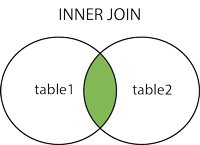

The INNER JOIN keyword selects all rows from both tables as long as there is a match between the columns. If there are records in the "Orders" table that do not have matches in "Customers", these orders will not be shown!

In [100]:
%%sql
/*inner join the tables of Orders and Customers. Choose the same primary key from both tables as connectors*/
SELECT C.CompanyName, O.CustomerID, O.OrderID
FROM Orders AS O INNER JOIN Customers AS C
ON O.CustomerID = C.CustomerID
ORDER BY C.CompanyName;

 * sqlite:///northwind.sqlite3
Done.


CompanyName,CustomerID,OrderID
Alfreds Futterkiste,ALFKI,10643
Alfreds Futterkiste,ALFKI,10692
Alfreds Futterkiste,ALFKI,10702
Alfreds Futterkiste,ALFKI,10835
Alfreds Futterkiste,ALFKI,10952
Alfreds Futterkiste,ALFKI,11011
Ana Trujillo Emparedados y helados,ANATR,10308
Ana Trujillo Emparedados y helados,ANATR,10625
Ana Trujillo Emparedados y helados,ANATR,10759
Ana Trujillo Emparedados y helados,ANATR,10926


In [101]:
%%sql
SELECT C.ContactName, C.CustomerID, O.OrderDate
FROM Customers AS C INNER JOIN Orders AS O
ON O.CustomerID = C.CustomerID
WHERE C.ContactName LIKE 'Laurence Lebihan';

 * sqlite:///northwind.sqlite3
Done.


ContactName,CustomerID,OrderDate
Laurence Lebihan,BONAP,2014-10-16 17:00:00.000
Laurence Lebihan,BONAP,2014-10-29 16:00:00.000
Laurence Lebihan,BONAP,2014-11-25 16:00:00.000
Laurence Lebihan,BONAP,2015-03-11 02:00:00.000
Laurence Lebihan,BONAP,2015-04-18 01:00:00.000
Laurence Lebihan,BONAP,2015-05-02 01:00:00.000
Laurence Lebihan,BONAP,2015-09-10 12:00:00.000
Laurence Lebihan,BONAP,2015-10-23 14:00:00.000
Laurence Lebihan,BONAP,2015-11-05 07:00:00.000
Laurence Lebihan,BONAP,2015-11-06 15:00:00.000


#Exercise 25#

Write a SQL inner join statement to list all product's name of one supplier.

In [102]:
%%sql
/*getting info record of Products table*/
SELECT *
FROM Products
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0
2,Chang,1,1,24 - 12 oz bottles,19,17,40,25,0
3,Aniseed Syrup,1,2,12 - 550 ml bottles,10,13,70,25,0


In [103]:
%%sql
/*getting info record of Suppliers table*/
SELECT *
FROM Suppliers
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,EC1 4SD,UK,(171) 555-2222,None,None
2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,None


In [104]:
%%sql
/*Choosing companyName of Exotic Liquids to list all its products*/
SELECT P.ProductName, P.ProductID, P.SupplierID, S.ContactName
FROM Products AS P INNER JOIN Suppliers AS S
ON P.SupplierID = S.SupplierID
WHERE S.CompanyName LIKE 'Exotic Liquids'
ORDER BY P.ProductName;

 * sqlite:///northwind.sqlite3
Done.


ProductName,ProductID,SupplierID,ContactName
Aniseed Syrup,3,1,Charlotte Cooper
Chai,1,1,Charlotte Cooper
Chang,2,1,Charlotte Cooper


#Exercise 26#

Write a SQL statement to list all orders of each customer.

In [105]:
%%sql
/*getting info record of Orders table*/
SELECT *
FROM Orders
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
10248,VINET,5,2014-07-04 08:00:00.000,2014-08-01 00:00:00.000,2014-07-16 00:00:00.000,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
10249,TOMSP,6,2014-07-05 04:00:00.000,2014-08-16 00:00:00.000,2014-07-10 00:00:00.000,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
10250,HANAR,4,2014-07-08 15:00:00.000,2014-08-05 00:00:00.000,2014-07-12 00:00:00.000,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil


In [106]:
%%sql
/*getting info record of Customers table*/
SELECT *
FROM Customers
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None


In [107]:
%%sql
SELECT O.CustomerID, C.CompanyName, C.ContactName, O.OrderID
FROM Orders AS O INNER JOIN Customers AS C
ON O.CustomerID = C.CustomerID
ORDER BY C.ContactName;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,OrderID
ROMEY,Romero y tomillo,Alejandra Camino,10281
ROMEY,Romero y tomillo,Alejandra Camino,10282
ROMEY,Romero y tomillo,Alejandra Camino,10306
ROMEY,Romero y tomillo,Alejandra Camino,10917
ROMEY,Romero y tomillo,Alejandra Camino,11013
MORGK,Morgenstern Gesundkost,Alexander Feuer,10277
MORGK,Morgenstern Gesundkost,Alexander Feuer,10575
MORGK,Morgenstern Gesundkost,Alexander Feuer,10699
MORGK,Morgenstern Gesundkost,Alexander Feuer,10779
MORGK,Morgenstern Gesundkost,Alexander Feuer,10945


#SQL LEFT JOIN#

The LEFT JOIN keyword returns all records from the left table (table1), and the matched records from the right table (table2). The result is NULL from the right side, if there is no match.


#LEFT JOIN Syntax:

SELECT column_name(s)

FROM table1 LEFT JOIN table2 

ON table1.column_name = table2.column_name;

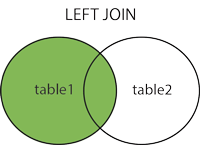

The LEFT JOIN keyword returns all records from the left table (Customers), even if there are no matches in the right table (Orders).

#Exercise 27#

Write a SQL statement to select all customers, and any orders they might have.

In [108]:
%%sql
/*we can see that Customers is table 1 while Orders is table 2*/
SELECT C.CustomerID, C.CompanyName, C.ContactName, O.OrderID
FROM Customers AS C LEFT JOIN Orders AS O
ON C.CustomerID = O.CustomerID
ORDER BY C.ContactName;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,OrderID
ROMEY,Romero y tomillo,Alejandra Camino,10281
ROMEY,Romero y tomillo,Alejandra Camino,10282
ROMEY,Romero y tomillo,Alejandra Camino,10306
ROMEY,Romero y tomillo,Alejandra Camino,10917
ROMEY,Romero y tomillo,Alejandra Camino,11013
MORGK,Morgenstern Gesundkost,Alexander Feuer,10277
MORGK,Morgenstern Gesundkost,Alexander Feuer,10575
MORGK,Morgenstern Gesundkost,Alexander Feuer,10699
MORGK,Morgenstern Gesundkost,Alexander Feuer,10779
MORGK,Morgenstern Gesundkost,Alexander Feuer,10945


In [109]:
%%sql
/*select all customers that orderid is null*/
SELECT *
FROM Customers AS C LEFT JOIN Orders AS O
ON C.CustomerID = O.CustomerID
WHERE OrderID IS NULL;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,OrderID,CustomerID_1,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
FISSA,FISSA Fabrica Inter. Salchichas S.A.,Diego Roel,Accounting Manager,"C/ Moralzarzal, 86",Madrid,None,28034,Spain,(91) 555 94 44,(91) 555 55 93,None,None,None,None,None,None,None,None,None,None,None,None,None,None
PARIS,Paris spécialités,Marie Bertrand,Owner,"265, boulevard Charonne",Paris,None,75012,France,(1) 42.34.22.66,(1) 42.34.22.77,None,None,None,None,None,None,None,None,None,None,None,None,None,None


#SQL RIGHT JOIN#

The RIGHT JOIN keyword returns all records from the right table (table2), and the matched records from the left table (table1). The result is NULL from the left side, when there is no match.


#RIGHT JOIN Syntax:

SELECT column_name(s)

FROM table1

RIGHT JOIN table2 ON table1.column_name = table2.column_name;

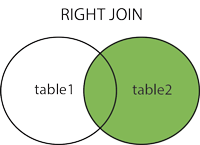

Write a SQL statement that return all employees, and any orders they might have placed.

In [110]:
%%sql
/*getting info record of table employees*/
SELECT *
FROM Employees
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


[(1, 'Davolio', 'Nancy', 'Sales Representative', 'Ms.', '1966-12-08 00:00:00.000', '2010-05-01 00:00:00.000', '507 - 20th Ave. E.\nApt. 2A', 'Seattle', 'WA', '98122', 'USA', '(206) 555-9857', '5467', b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\x14\x00!\x00\xff\xff\xff\xffBitmap Image\x00Paint.Picture\x00\x01\x05\x00\x00\x02\x00\x00\x00\x07\x00\x0 ... (80909 characters truncated) ... 0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x00\x00\x00\x00\x00\x00\xb4\xad\x05\xfe', 'Education includes a BA in psychology from Colorado State University in 1970.  She also completed "The Art of the Cold Call."  Nancy is a member of Toastmasters International.', 2, 'http://accweb/emmployees/davolio.bmp'),
 (2, 'Fuller', 'Andrew', 'Vice President, Sales', 'Dr.', '1970-02-19 00:00:00.000', '2010-08-14 00:00:00.000', '908 W. Capital Way', 'Tacoma', 'WA', '98401', 'USA', '(206) 555-9482', '3457', b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\x14\x00!\x00\xff\xff\xff\xffBitmap Image\x00Paint.Picture\x00\x01\x05\x00\x00\x02\x00\x00\x00\x07\x00\x0 ... (83899 characters truncated) ... 0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x00\x00\x00\x00\x00\x00\x89\xad\x05\xfe', 'Andrew received his BTS commercial in 1974 and a Ph.D. in international marketing from the University of Dallas in 1981.  He is fluent in French and  ... (150 characters truncated) ... es in March 1993.  Andrew is a member of the Sales Management Roundtable, the Seattle Chamber of Commerce, and the Pacific Rim Importers Association.', None, 'http://accweb/emmployees/fuller.bmp'),
 (3, 'Leverling', 'Janet', 'Sales Representative', 'Ms.', '1981-08-30 00:00:00.000', '2010-04-01 00:00:00.000', '722 Moss Bay Blvd.', 'Kirkland', 'WA', '98033', 'USA', '(206) 555-3412', '3355', b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\x14\x00!\x00\xff\xff\xff\xffBitmap Image\x00Paint.Picture\x00\x01\x05\x00\x00\x02\x00\x00\x00\x07\x00\x0 ... (83499 characters truncated) ... f\xff\xde\xfd\xef\xde\xfd\xef\xdf\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x00\x00\x00\x00\x00\x00\xa9\xad\x05\xfe', 'Janet has a BS degree in chemistry from Boston College (1984).  She has also completed a certificate program in food retailing management.  Janet was hired as a sales associate in 1991 and promoted to sales representative in February 1992.', 2, 'http://accweb/emmployees/leverling.bmp')]

In [111]:
%%sql
/*getting info record of table orders*/
SELECT *
FROM Orders
LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
10248,VINET,5,2014-07-04 08:00:00.000,2014-08-01 00:00:00.000,2014-07-16 00:00:00.000,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
10249,TOMSP,6,2014-07-05 04:00:00.000,2014-08-16 00:00:00.000,2014-07-10 00:00:00.000,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
10250,HANAR,4,2014-07-08 15:00:00.000,2014-08-05 00:00:00.000,2014-07-12 00:00:00.000,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil


In [112]:
%%sql
/*find the employees that got orders*/
SELECT E.EmployeeID, E.FirstName, E.LastName, O.OrderID
FROM Orders AS O
RIGHT JOIN Employees AS E ON O.EmployeeID = E.EmployeeID
ORDER BY E.EmployeeID;

 * sqlite:///northwind.sqlite3
(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: /*find the employees that got orders*/
SELECT E.EmployeeID, E.FirstName, E.LastName, O.OrderID
FROM Orders AS O
RIGHT JOIN Employees AS E ON O.EmployeeID = E.EmployeeID
ORDER BY E.EmployeeID;]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [113]:
%%sql
/*since RIGHT Join not supported by SQLlite, we use left join, and tukar kedudukan tablenya!*/
SELECT E.EmployeeID, E.FirstName, E.LastName, O.OrderID
FROM Employees AS E LEFT JOIN Orders AS O
ON E.EmployeeID = O.EmployeeID
ORDER BY E.EmployeeID;

 * sqlite:///northwind.sqlite3
Done.


EmployeeID,FirstName,LastName,OrderID
1,Nancy,Davolio,10258
1,Nancy,Davolio,10270
1,Nancy,Davolio,10275
1,Nancy,Davolio,10285
1,Nancy,Davolio,10292
1,Nancy,Davolio,10293
1,Nancy,Davolio,10304
1,Nancy,Davolio,10306
1,Nancy,Davolio,10311
1,Nancy,Davolio,10314


#SQL FULL OUTER JOIN#

The FULL OUTER JOIN keyword return all records when there is a match in either left (table1) or right (table2) table records.


#FULL OUTER JOIN Syntax:

SELECT column_name(s)

FROM table1

FULL OUTER JOIN table2 ON table1.column_name = table2.column_name;

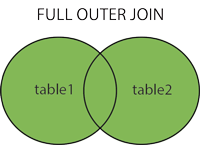

Write a SQL statement to select all customers, and all orders.

In [114]:
%%sql
SELECT C.ContactName, C.CustomerID, O.OrderID, O.OrderDate
FROM Customers AS C FULL OUTER JOIN Orders AS O
ON C.CustomerID = O.CustomerID
ORDER BY C.ContactName;

 * sqlite:///northwind.sqlite3
(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: SELECT C.ContactName, C.CustomerID, O.OrderID, O.OrderDate
FROM Customers AS C FULL OUTER JOIN Orders AS O
ON C.CustomerID = O.CustomerID
ORDER BY C.ContactName;]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [115]:
%%sql
/*since FULL OUTER Join not supported by SQLlite, we use left join, and union both!*/
SELECT C.ContactName, C.CustomerID, O.OrderID, O.OrderDate
FROM Customers AS C LEFT JOIN Orders AS O
ON C.CustomerID = O.CustomerID

UNION

SELECT C.ContactName, C.CustomerID, O.OrderID, O.OrderDate
FROM Orders AS O LEFT JOIN Customers AS C
ON C.CustomerID = O.CustomerID
ORDER BY C.ContactName;

 * sqlite:///northwind.sqlite3
Done.


ContactName,CustomerID,OrderID,OrderDate
Alejandra Camino,ROMEY,10281,2014-08-14 14:00:00.000
Alejandra Camino,ROMEY,10282,2014-08-15 00:00:00.000
Alejandra Camino,ROMEY,10306,2014-09-16 09:00:00.000
Alejandra Camino,ROMEY,10917,2016-03-02 02:00:00.000
Alejandra Camino,ROMEY,11013,2016-04-09 13:00:00.000
Alexander Feuer,MORGK,10277,2014-08-09 11:00:00.000
Alexander Feuer,MORGK,10575,2015-06-20 22:00:00.000
Alexander Feuer,MORGK,10699,2015-10-09 05:00:00.000
Alexander Feuer,MORGK,10779,2015-12-16 04:00:00.000
Alexander Feuer,MORGK,10945,2016-03-12 12:00:00.000


#SQL GROUP BY#

The GROUP BY statement is often used with aggregate functions (COUNT, MAX, MIN, SUM, AVG) to group the result-set by one or more columns.


#GROUP BY Syntax:

SELECT column_name(s)

FROM table_name

WHERE condition

GROUP BY column_name(s)

ORDER BY column_name(s);

#Exercise 28#

Write a SQL statement to list the number of customers in each country:

In [116]:
%%sql
/*getting info record of Customers table*/
SELECT *
FROM Customers
LIMIT 1;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545


In [117]:
%%sql
SELECT Country, COUNT(*) AS Num_Customers
FROM Customers
GROUP BY Country
ORDER BY Num_Customers;

 * sqlite:///northwind.sqlite3
Done.


Country,Num_Customers
Ireland,1
Norway,1
Poland,1
Austria,2
Belgium,2
Denmark,2
Finland,2
Portugal,2
Sweden,2
Switzerland,2


#Exercise 29#

Write a SQL statement to list the number of customers in each country, sorted high to low:

In [118]:
%%sql
SELECT Country, COUNT(*) AS Num_Customers
FROM Customers
GROUP BY Country
ORDER BY Num_Customers DESC;

 * sqlite:///northwind.sqlite3
Done.


Country,Num_Customers
USA,13
France,11
Germany,11
Brazil,9
UK,7
Mexico,5
Spain,5
Venezuela,4
Argentina,3
Canada,3


#Exercise 30#

Write a SQL statement to list the number of orders of each customer.

In [119]:
%%sql
SELECT CustomerID, COUNT(*) AS Num_Order
FROM Orders
GROUP BY CustomerID
ORDER BY Num_Order;

 * sqlite:///northwind.sqlite3
Done.


CustomerID,Num_Order
CENTC,1
GROSR,2
LAZYK,2
BOLID,3
CONSH,3
FRANR,3
LAUGB,3
NORTS,3
THECR,3
TRAIH,3


#SQL HAVING Clause#

The HAVING clause was added to SQL because the WHERE keyword could not be used with aggregate functions.


#HAVING Syntax:

SELECT column_name(s)

FROM table_name

WHERE condition

GROUP BY column_name(s)

HAVING condition

ORDER BY column_name(s);

#Exercise 31#

Write a SQL statement to list the number of customers in each country. Only include countries with more than 5 customers, and then sort them from high to low.¶

In [128]:
%%sql
SELECT Country, COUNT(*) AS Num_Customers
FROM Customers
GROUP BY Country
HAVING Num_Customers > 5
ORDER BY Num_Customers DESC;

 * sqlite:///northwind.sqlite3
Done.


Country,Num_Customers
USA,13
France,11
Germany,11
Brazil,9
UK,7


#Exercise 32#

Write a SQL statement to list the employees that have registered more than 50 orders:

In [130]:
%%sql
SELECT *
FROM Orders
LIMIT 1;

 * sqlite:///northwind.sqlite3
Done.


OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
10248,VINET,5,2014-07-04 08:00:00.000,2014-08-01 00:00:00.000,2014-07-16 00:00:00.000,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France


In [131]:
%%sql
SELECT EmployeeID, COUNT(OrderID) AS Num_Orders
FROM Orders
GROUP BY EmployeeID
HAVING Num_Orders > 50
ORDER BY Num_Orders;

 * sqlite:///northwind.sqlite3
Done.


EmployeeID,Num_Orders
6,67
7,72
2,96
8,104
1,123
3,127
4,156


In [132]:
#other option use left join!
#%%sql SELECT e.Employeeid, count(orderid) as [Number of Orders]
#from employees e inner join orders o
#on e.employeeid=o.employeeid
#group by e.employeeid
#having [Number of Orders] > 50
#order by [Number of Orders] DESC

#SQL EXISTS#

The EXISTS operator is used to test for the existence of any record in a subquery.

The EXISTS operator returns true if the subquery returns one or more records.


EXISTS Syntax:

SELECT column_name(s)

FROM table_name

WHERE EXISTS

(SELECT column_name FROM table_name WHERE condition);

#Exercise 33#

Write a SQL statement to list the suppliers with a product price less than 20.

In [133]:
%%sql
SELECT *
FROM Products
LIMIT 1;

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0


In [134]:
%%sql
SELECT *
FROM Suppliers
LIMIT 1;

 * sqlite:///northwind.sqlite3
Done.


SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,EC1 4SD,UK,(171) 555-2222,None,None


In [137]:
%%sql
SELECT CompanyName AS Suppliers_Company, SupplierID
FROM Suppliers
WHERE EXISTS (SELECT SupplierID FROM Products WHERE UnitPrice < 20);

 * sqlite:///northwind.sqlite3
Done.


Suppliers_Company,SupplierID
Aux joyeux ecclésiastiques,18
Bigfoot Breweries,16
Cooperativa de Quesos 'Las Cabras',5
Escargots Nouveaux,27
Exotic Liquids,1
Formaggi Fortini s.r.l.,14
Forêts d'érables,29
"G'day, Mate",24
Gai pâturage,28
Grandma Kelly's Homestead,3


#SQL ANY and ALL Operators#

The ANY and ALL operators are used with a WHERE or HAVING clause.

The ANY operator returns true if any of the subquery values meet the condition.

The ALL operator returns true if all of the subquery values meet the condition.


ANY Syntax:

SELECT column_name(s)

FROM table_name

WHERE column_name operator ANY

(SELECT column_name FROM table_name WHERE condition);


ALL Syntax:

SELECT column_name(s)

FROM table_name

WHERE column_name operator ALL

(SELECT column_name FROM table_name WHERE condition);


SQLite doesn't support ANY and ALL. :-)


#Views#

A view is nothing more than a SQLite statement that is stored in the database with an associated name. It is actually a composition of a table in the form of a predefined SQLite query. A view can contain all rows of a table or selected rows from one or more tables. A view can be created from one or many tables which depends on the written SQLite query to create a view. Views which are kind of virtual tables, allow the users to :−

Structure data in a way that users or classes of users find natural or intuitive.

Restrict access to the data such that a user can only see limited data instead of a complete table.

Summarize data from various tables, which can be used to generate reports.


SQLite views are read-only and thus you may not be able to execute a DELETE, INSERT or UPDATE statement on a view. However, you can create a trigger on a view that fires on an attempt to DELETE, INSERT, or UPDATE a view and do what you need in the body of the trigger.


CREATE [TEMP | TEMPORARY] VIEW view_name AS

SELECT column1, column2.....

FROM table_name

WHERE [condition];

#Data Definition Language (DDL)#

DDL deals with the schemas and structures of database. Examples of DDL are CREATE, ALTER, DROP, and TRUNCATE. In this tutorial, we will use DROP to drop a table from the database.

DROP TABLE table_name;

Query example:


%%sql

DROP VIEW IF EXISTS Current_Product_List;

CREATE VIEW Current_Product_List AS SELECT ProductID, ProductName FROM Products WHERE SupplierID= 2;

SELECT * FROM Current_Product_List;